# Model Selection and Hyperparameter Tuning Exercise (6 points)

The homework assignment is due by the end of the day on Thursday, November 13.

You are expected to solve the assignment problems independently and adhere to the university's policies for academic honesty and integrity. Copying solutions to the assignment problems from your classmates, the internet, or anywhere else is strictly prohibited.

**Note that your solutions are expected to follow the code examples provided in the lecture notes. If your solution to a problem uses functions or codes that are not covered in the lecture notes, that will result in zero marks assigned for that problem.**

Model Selection and Hyperparameter Tuning exercise: 6 points

Total points for Assignment 5: 25 points

In [2]:
import zipfile
import os

zip_path = "/content/Scenes_dataset.zip"
extract_dir = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

## Part 1. Load the Dataset (1 point)

For this exercise, we will use the image dataset `Scenes`, which has 4,436 images of different scenes, categorized into 10 classes. The classes include: airport terminal, amusement park, bedroom, bridge, castle, conference room, golf course, highway, mountain, and playground.

Follow the instructions in Lecture 16 for loading a custom dataset, and load the `Scenes` dataset from the `data` directory. The dataset contains one directory with all 4,436 images, and a `labels.csv` file with the class labels for the images. For the resolution of the loaded images, select 128x128 pixels. First load all images, and afterwards you will split them into training and testing sets.

In [4]:
import pandas as pd
import os
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from os import listdir
import natsort
import numpy as np

data_dir = "data/Scenes_dataset/"
images_dir = os.path.join(data_dir, "images/")
labels_dir = os.path.join(data_dir, "labels.csv")

image_size = 128

def load_imgs(path):
    # List of all images in the folder
    imgList = listdir(path)
    # Make sure that the images are sorted in ascending order
    imgList=natsort.natsorted(imgList)
    # Number of images
    number_imgs = len(imgList)
    # Initialize numpy arrays for the images
    images = np.zeros((number_imgs, image_size, image_size, 3))
    # Read the images
    for i in range(number_imgs):
        tmp_img = load_img(path + imgList[i], target_size=(image_size, image_size, 3))
        img = img_to_array(tmp_img)
        images[i] = img/255.0
    return images

imgs = load_imgs(images_dir)

Split the dataset into a training and 20% testing dataset. Display the shape of the train and test arrays of the images and labels.

In [5]:
# Your Code Here
image_labels = np.genfromtxt(labels_dir, delimiter=',', dtype=np.int32)
X_train, X_test, y_train, y_test = train_test_split(imgs, image_labels, test_size=0.2, random_state=42, stratify=image_labels)

print('Training data inputs', X_train.shape)
print('Training labels', X_test.shape)
print('Testing data inputs', y_train.shape)
print('Testing labels', y_test.shape)

Training data inputs (3548, 128, 128, 3)
Training labels (888, 128, 128, 3)
Testing data inputs (3548,)
Testing labels (888,)


Display the maximum and minimum values of the images. If needed, resize the images so that their values are in the [0,1] range.

In [ ]:
# Your Code Here
print("Max pixel:", np.max(imgs))
print("Min pixel:", np.min(imgs))

Max pixel: 1.0
Min pixel: 0.0


Display several images in the training dataset **and their labels**. Check to ensure that the labels match the images.

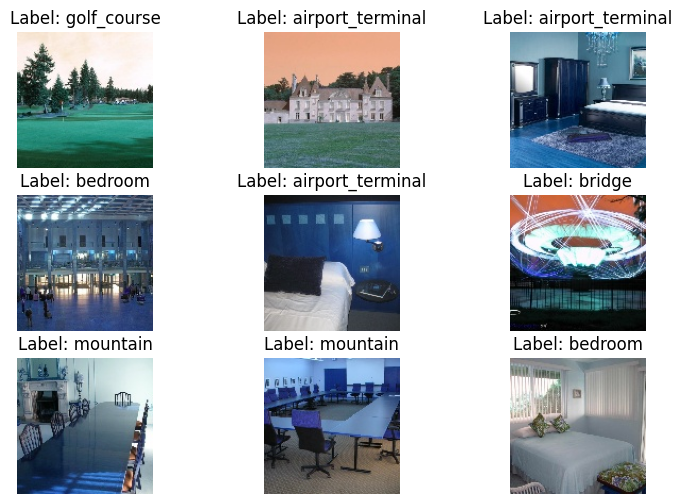

In [6]:
label_names = ['airport_terminal', 'amusement_park', 'bedroom', 'bridge', 'castle', 'conference_room',
               'golf_course', 'highway', 'mountain', 'playground']

# Your Code Here
plt.figure(figsize=(9, 6))
for n in range(9):
    i = np.random.randint(0, len(X_train), 1)
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(imgs[i[0]])
    plt.title("Label: " + label_names[y_train[i[0]]])
    plt.axis("off")

## Part 2. Model Definition and Training (1 point)

Create a CNN model called `model_1` which has similar architecture to the `cifar_cnn` network from the lecture on CNNs, and has 3 blocks of Conv2D-Conv2D-MaxPooling layers with 64, 128, and 256 filters, a Flatten layer, two Dense layers with 128 and 64 neurons, and an output Dense layer.

In [ ]:
# Your Code Here
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model

inputs = Input(shape=(128, 128, 3))

conv1a = Conv2D(filters=64, kernel_size=3, padding='same')(inputs)
conv1b = Conv2D(filters=64, kernel_size=3, padding='same')(conv1a)
pool1 = MaxPooling2D()(conv1b)

conv2a = Conv2D(filters=128, kernel_size=3, padding='same')(pool1)
conv2b = Conv2D(filters=128, kernel_size=3, padding='same')(conv2a)
pool2 = MaxPooling2D()(conv2b)

conv3a = Conv2D(filters=256, kernel_size=3, padding='same')(pool2)
conv3b = Conv2D(filters=256, kernel_size=3, padding='same')(conv3a)
pool3 = MaxPooling2D()(conv3b)

flat = Flatten()(pool3)
dense1 = Dense(128, activation='relu')(flat)
dense2 = Dense(64, activation='relu')(dense1)

outputs = Dense(10, activation='softmax')(dense2)

model = Model(inputs, outputs)

Display a summary of the model. State how many parameters the model has.

In [ ]:
# Your Code Here
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,543,050 (36.40 MB)

 Trainable params: 9,543,050 (36.40 MB)

 Non-trainable params: 0 (0.00 B)

Compile the model using Adam optimizer with a learning rate of 1e-4, and define the suitable loss function for this model. Use accuracy as a metric.

In [ ]:
# Your Code Here
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Train the model by using a batch size of 64 images for updating the model parameters, and assign 20% of the training data as a validation set. Use Early Stopping callback with a patience of 10 epochs. Set the number of epochs to 100.

The model training should take between 4 and 10 minutes with a GPU.

In [ ]:
# Your Code Here
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 48s 499ms/step - accuracy: 0.1580 - loss: 6.9282 - val_accuracy: 0.3028 - val_loss: 2.2678
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - accuracy: 0.3644 - loss: 1.8475 - val_accuracy: 0.4732 - val_loss: 1.5045
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.5214 - loss: 1.3936 - val_accuracy: 0.5732 - val_loss: 1.3102
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - accuracy: 0.5679 - loss: 1.2326 - val_accuracy: 0.5789 - val_loss: 1.2863
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 191ms/step - accuracy: 0.5908 - loss: 1.1717 - val_accuracy: 0.5859 - val_loss: 1.2742
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.5947 - loss: 1.0986 - val_accuracy: 0.5577 - val_loss: 1.3085
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 196ms/step - accuracy: 0.6212 - loss: 1.1041 - val_accuracy: 0.6014 - val_loss: 1.2212
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step - accuracy: 0.6592 - loss: 0.9632 - val_acc

Plot the learning curves of the model.

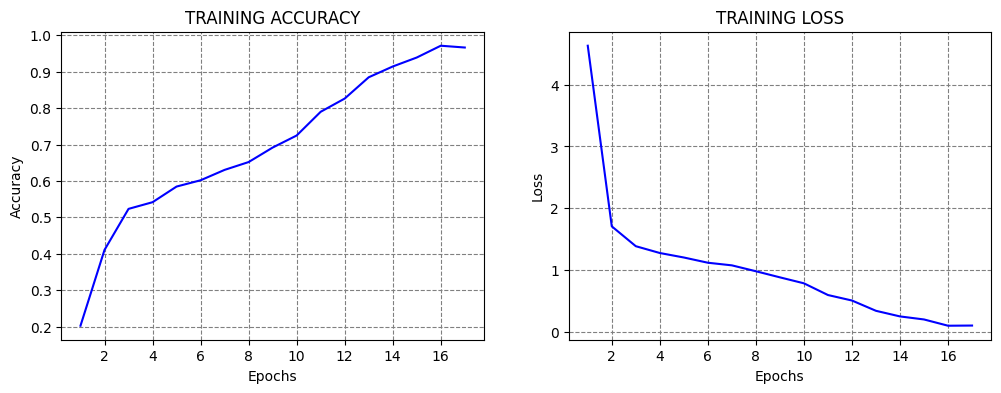

In [ ]:
# Your Code Here
train_loss = history.history['loss']
acc = history.history['accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Calculate the accuracy of the model on the test dataset. Discuss the performance of the model in 1-2 sentences.

In [ ]:

# Your Code Here
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")

# the model with accuracy: 0.5867 - loss: 1.2295,
# the model often assigns predictions away from the correct class and has poor accuracy
# but still learning a good bit.


28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.5827 - loss: 1.2622
Test accuracy: 57.43 %


## Part 3. Transfer Learning (1 point)

Create a model named `model_2` that is similar to the CNN models for transfer learning in Lectures 16 and 17, and uses a VGG-16 as a base model, followed by a Global Average Pooling layer, two Dense layers with 128 and 64 neurons, Dropout layers, and an output Dense layer.

In [ ]:
# Your Code Here
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

model_2 = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Compile the model using Adam optimizer with a learning rate of 1e-4, and train it by using the same settings as for `model_1`.

The model training should take between 5 and 15 minutes with a GPU.

In [ ]:
# Your Code Here
import datetime
now = datetime.datetime.now
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
t = now()
history = model_2.fit(X_train, y_train, validation_split=0.2, batch_size=128,
                    epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])
print('Training time: %s' % (now() - t))

Training time: 0:12:33.001690


Plot the learning curves, evaluate the accuracy on the test dataset, and briefly discuss the performance in comparison to `model_1`.

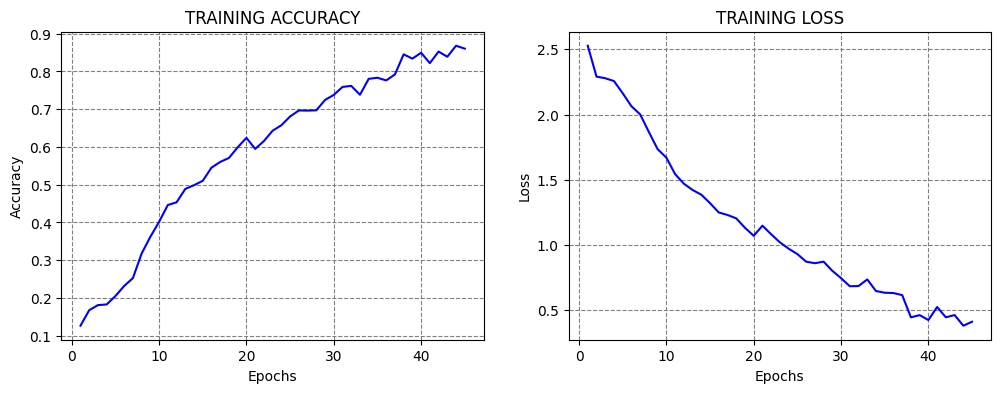

28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.6918 - loss: 1.1547
Test accuracy: 68.69 %


In [ ]:
# Your Code Here
train_loss = history.history['loss']
acc = history.history['accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_loss, test_acc = model_2.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")

Plot a few images from the test dataset and **display the ground-truth and predicted labels**.

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step


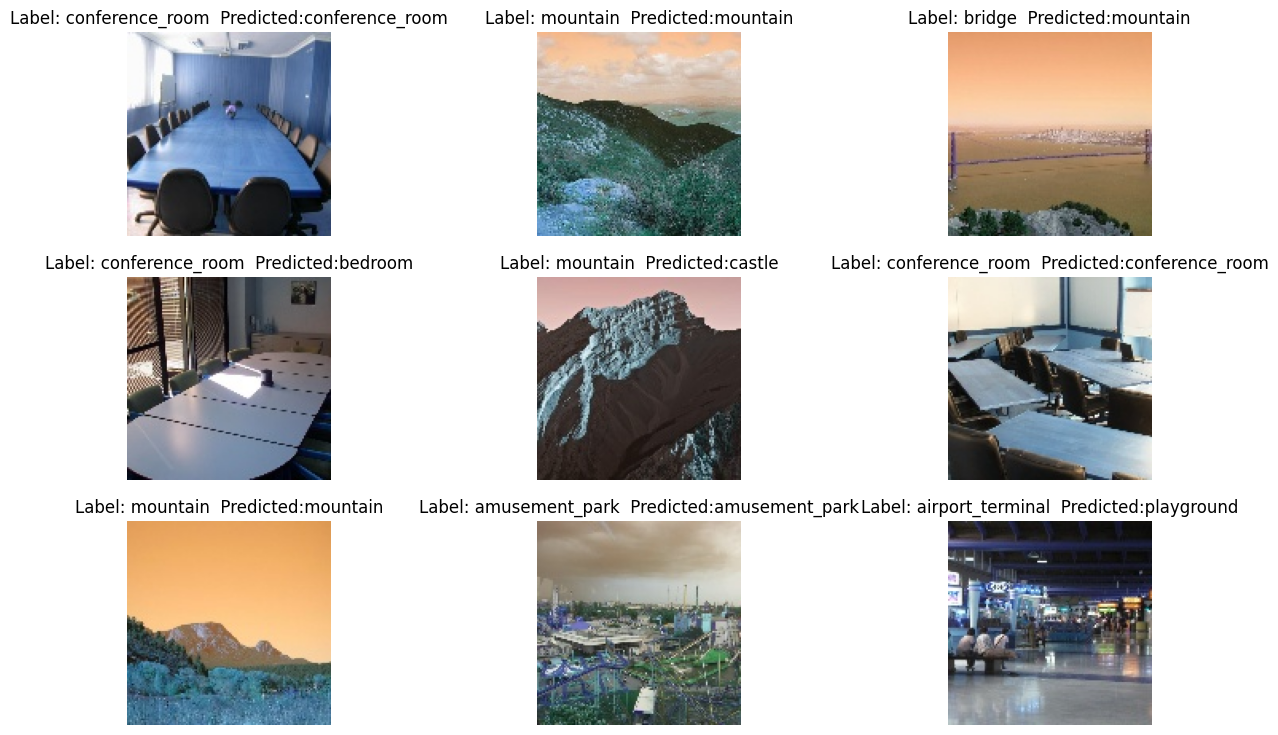

In [ ]:
# Your Code Here
predictions = model_2.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 9))
for n in range(9):
    i = np.random.randint(0, len(X_test))
    ax = plt.subplot(3, 3, n+1)
    plt.imshow(X_test[i])
    plt.title("Label: " + label_names[y_test[i]] + "  Predicted:" + label_names[pred_labels[i]])
    plt.axis("off")

## Part 4. Learning Rate 1e-3 (0.5 points)

Create a new instance of a model named `model_3` with the exact same architecture and hyperparameters as `model_2`, and train it with a learning rate of 1e-3. Plot the learning curves, and evaluate the model.

Ensure that every model begins the training from a random initialization, and does not continue from the previous model.

Training time: 687.8422503471375 seconds


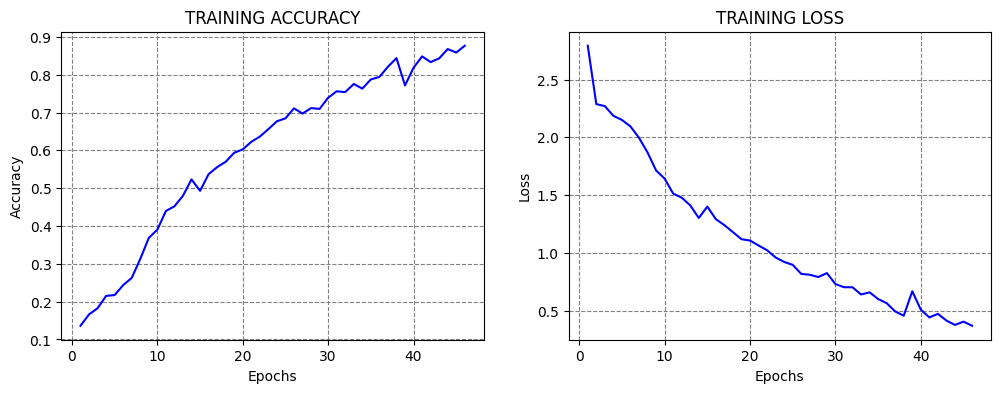

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6186 - loss: 1.6165
Test accuracy: 60.02 %


In [ ]:
# Your Code Here
# Your Code Here
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

model_3 = Model(inputs=base_model.input, outputs=predictions)

model_3.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
t = time.time()
history = model_3.fit(X_train, y_train, validation_split=0.2, batch_size=128,
                    epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])
print('Training time: %s' % (time.time() - t), "seconds")

train_loss = history.history['loss']
acc = history.history['accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_loss, test_acc = model_3.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")

## Part 5. Learning Rate of 1e-5 (0.5 points)

Similarly, create a new instance named `model_4` , and train it with a learning rate of 1e-5. Plot the learning curves, and evaluate the model.

Training time: 555.6754639148712 seconds


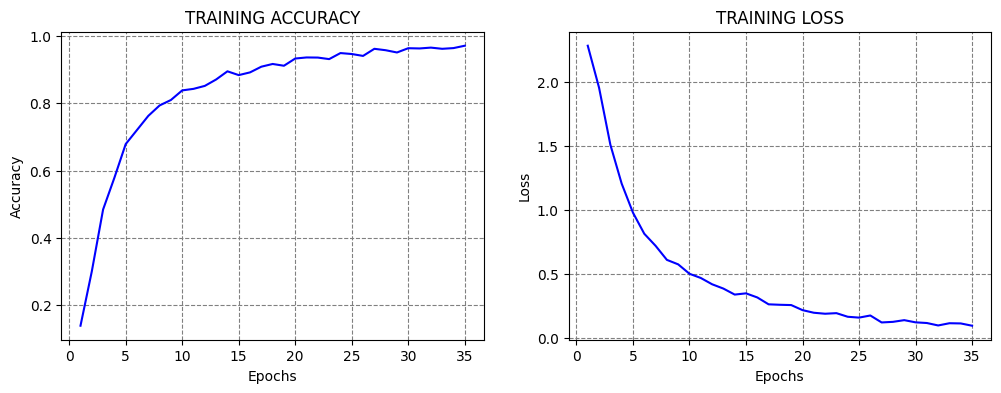

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8890 - loss: 0.4676
Test accuracy: 88.74 %


In [ ]:
# Your Code Here
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

model_4 = Model(inputs=base_model.input, outputs=predictions)

model_4.compile(optimizer=Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
t = time.time()
history = model_4.fit(X_train, y_train, validation_split=0.2, batch_size=128,
                    epochs=100, verbose=0, callbacks=[EarlyStopping(monitor='val_loss', patience = 10)])
print('Training time: %s' % (time.time() - t), "seconds")

train_loss = history.history['loss']
acc = history.history['accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_loss, test_acc = model_4.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")

## Part 6. ReduceLROnPlateau (1 point)

Create a new model named `model_5` that is similar to the previous models, and train it with using ReduceLROnPlateau callback, by reducing the learning rate from 1e-4 to 1e-6. Combine it with an Early Stopping callback to stop the training at the end if the validation loss doesn't decrease. Plot the learning curves, and evaluate the model.


Epoch 18: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.

Epoch 34: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.

Epoch 40: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.

Epoch 44: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
Epoch 46: early stopping
Restoring model weights from the end of the best epoch: 41.
Training time: 690.4077372550964 seconds


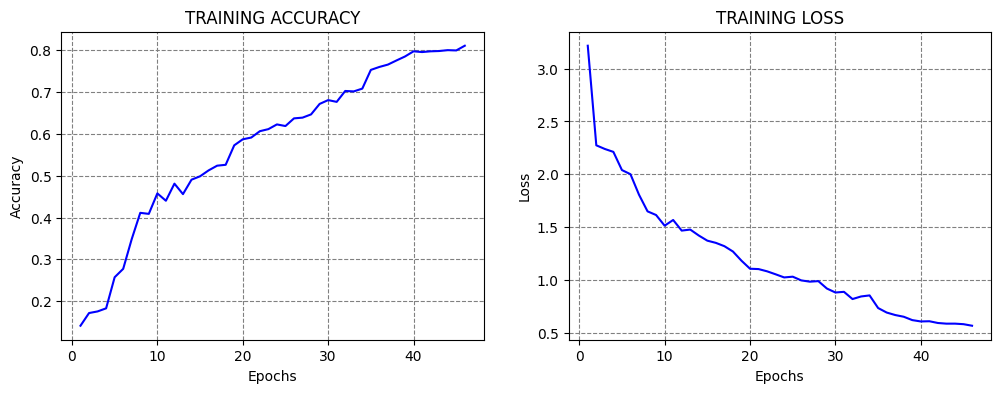

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.6652 - loss: 1.1136
Test accuracy: 65.54 %


In [ ]:
# Your Code Here
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

model_5 = Model(inputs=base_model.input, outputs=predictions)

model_5.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
t = time.time()
history = model_5.fit(X_train, y_train, validation_split=0.2, batch_size=128,
                    epochs=100, verbose=0, callbacks=[reduce_lr, early_stop])
print('Training time: %s' % (time.time() - t), "seconds")

train_loss = history.history['loss']
acc = history.history['accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_loss, test_acc = model_5.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")


## Part 7. Data Augmentation (1 point)

Create a new model named `model_6` that is similar to `model_5` but uses data augmentation. Apply the following augmentation operations:
- Width shift 10%
- Height shift 10%
- Horizontal flip
- Zoom range 20%
- Shear range 10%
- Rotation range 10 degrees

In [7]:
# Your Code Here
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10,
    validation_split=0.2
)

train_gen = datagen.flow(X_train, y_train, subset='training', batch_size=32)
val_gen = datagen.flow(X_train, y_train, subset='validation', batch_size=32)

base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

model_6 = Model(inputs=base_model.input, outputs=predictions)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. Display the shapes of the train and validation arrays.

In [8]:
# Your Code Here
# this is just doing it again on the previous split to split it even more?
X_train, X_test, y_train, y_test = train_test_split(imgs, image_labels, test_size=0.2, random_state=42, stratify=image_labels)
print('Training data inputs', X_train.shape)
print('Training labels', X_test.shape)
print('Testing data inputs', y_train.shape)
print('Testing labels', y_test.shape)

Training data inputs (3548, 128, 128, 3)
Training labels (888, 128, 128, 3)
Testing data inputs (3548,)
Testing labels (888,)


Train the model using Early Stopping and show the training time. Plot the learning curves and evaluate the model.

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 64s 461ms/step - accuracy: 0.1498 - loss: 2.6203 - val_accuracy: 0.1834 - val_loss: 2.2565 - learning_rate: 0.0010
Epoch 2/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - accuracy: 0.1739 - loss: 2.3035 - val_accuracy: 0.1834 - val_loss: 2.2822 - learning_rate: 0.0010
Epoch 3/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.1691 - loss: 2.3000 - val_accuracy: 0.1834 - val_loss: 2.2718 - learning_rate: 0.0010
Epoch 4/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.1855 - loss: 2.2731 - val_accuracy: 0.1834 - val_loss: 2.2745 - learning_rate: 0.0010
Epoch 5/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.1831 - loss: 2.2623 - val_accuracy: 0.1834 - val_loss: 2.1189 - learning_rate: 2.0000e-04
Epoch 6/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 0.1817 - loss: 2.1248 - val_accuracy: 0.1834 - val_loss: 2.0362 - learning_rate: 2.0000e-04
Epoch 7/50
89/89 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.1888 - 

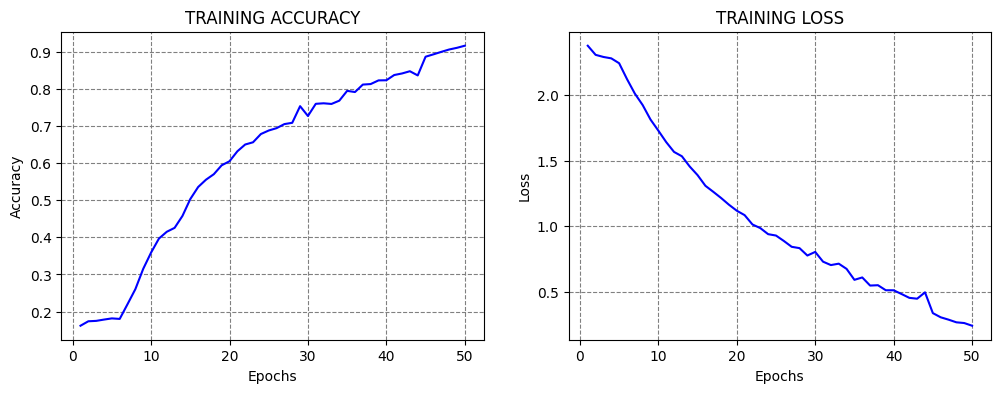

28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.7818 - loss: 0.8119
Test accuracy: 78.49 %


In [9]:
# Your Code Here
model_6.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
t = time.time()
history = model_6.fit(train_gen, epochs=50, validation_data=val_gen,
                    callbacks=[reduce_lr, early_stop])
print('Training time: %s' % (time.time() - t), "seconds")

train_loss = history.history['loss']
acc = history.history['accuracy']

epochsn = np.arange(1, len(train_loss)+1,1)
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(epochsn, acc, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING ACCURACY')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochsn,train_loss, 'b')
plt.grid(color='gray', linestyle='--')
plt.title('TRAINING LOSS')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

test_loss, test_acc = model_6.evaluate(X_test, y_test)
print("Test accuracy:", round(test_acc * 100, 2), "%")

Briefly discuss the performance of the models and elaborate on the impact of different hyperparameters, callbacks, and data augmentation on the performance.

57.43 model 1 basic

68.69 model 2 1e-4 vgg==16 global average pooling

60.02 model 3 1e-3

88.74 model 4 1e-5

65.54 model 5 reduceLR

78.49 model 6 data augment

It looks like data augmenting significantly increases accuracy, so does global average pooling from model 1 to model 2+

The lower learning rate also seems to help a lot in increasing accuracy, but seems to need to be precise. Model 5 did a little better than model 3, but model 4 starting out at 1e-5 did even better.